In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:05<00:00, 212MB/s]
100% 1.06G/1.06G [00:05<00:00, 218MB/s]


In [3]:
import zipfile
ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
ref.extractall('/content')
ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras as tf_keras
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout

In [5]:
# Generators very useful large data
train_ds = tf_keras.utils.image_dataset_from_directory(
    directory  = '/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

validation_ds = tf_keras.utils.image_dataset_from_directory(
    directory  = '/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds .map(process)

In [7]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 104ms/step - loss: 1.6531 - accuracy: 0.5717 - val_loss: 0.6904 - val_accuracy: 0.6146
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.6195 - accuracy: 0.6661 - val_loss: 2.1466 - val_accuracy: 0.6010
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5386 - accuracy: 0.7327 - val_loss: 0.7611 - val_accuracy: 0.6240
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4654 - accuracy: 0.7829 - val_loss: 0.5501 - val_accuracy: 0.7354
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3987 - accuracy: 0.8240 - val_loss: 0.5884 - val_accuracy: 0.7110
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3201 - accuracy: 0.8625 - val_loss: 0.5808 - val_accuracy: 0.7470
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2453 - accuracy: 0.8965 - val_loss: 0.5514 - val_ac

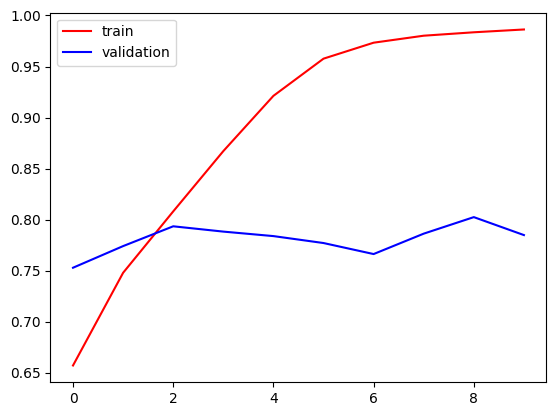

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

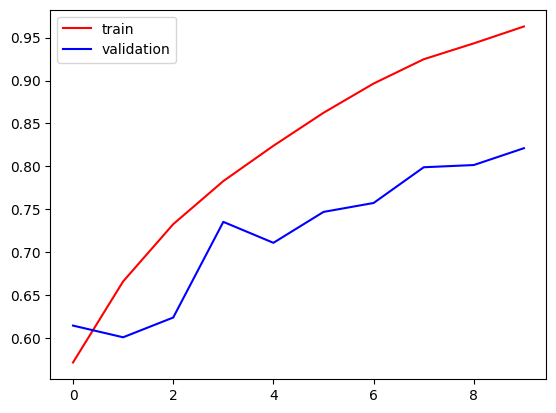

In [12]:
# new D N
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

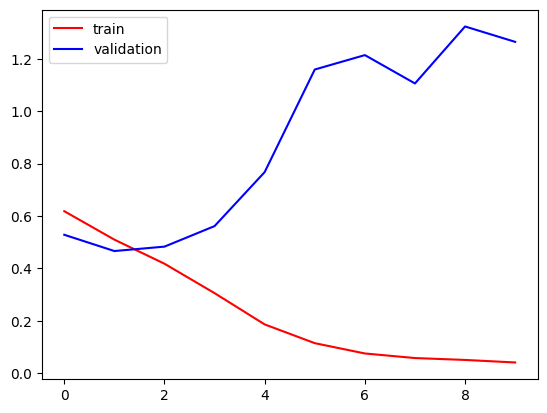

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

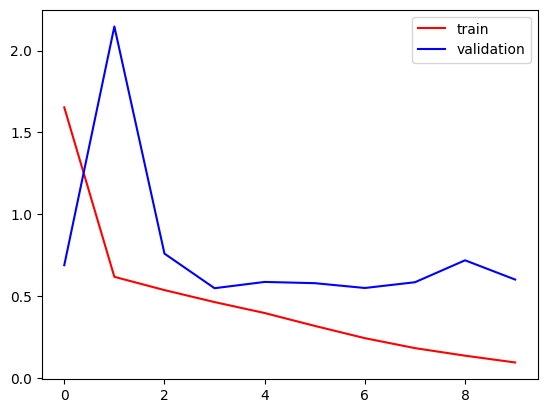

In [13]:
# new D N
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
# Ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout ---> done
# Batch Norm---> done
# Reduce complxity
 # these are some of the steps

In [15]:
# prediction 1
import cv2

In [16]:
test_img = cv2.imread('/content/d11.jpg')

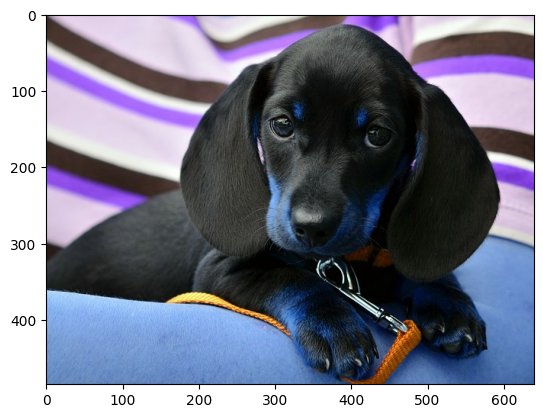

In [17]:
plt.imshow(test_img)

In [18]:
test_img.shape

(485, 640, 3)

In [27]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 385ms/step


array([[1.]], dtype=float32)

In [33]:
# prediction 2
test_img1 = cv2.imread('/content/c11.jpg')

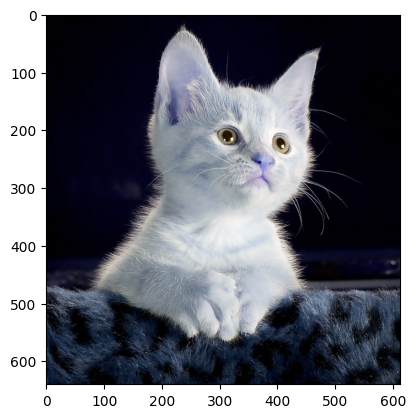

In [34]:
plt.imshow(test_img1)

In [43]:
test_img1.shape

(256, 256, 3)

In [44]:
test_img1 = cv2.resize(test_img1,(256,256))

In [45]:
test_input1 = test_img1.reshape((1,256,256,3))

In [46]:
model.predict(test_input1)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)